In [1]:
# !pip install arch

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from arch import arch_model
import statsmodels.api as sm

In [71]:
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime

In [72]:
data = pd.read_excel("D:/AAU/Module_4/Project_mo_4/pune_tomato_market.xlsx")
data

,Date,Arrival,Price
0,2010-01-03,70.4,1300.0
1,2010-01-04,70.4,1300.0
2,2010-01-05,70.4,1300.0
3,2010-01-06,70.4,1300.0
4,2010-01-07,70.4,1300.0
...,...,...,...
5012,2023-09-24,235.0,700.0
5013,2023-09-25,223.0,700.0
5014,2023-09-26,246.0,600.0
5015,2023-09-27,166.0,550.0


In [73]:
data.set_index('Date', inplace=True)
data.head(1)

,Arrival,Price
Date,,
2010-01-03,70.4,1300.0


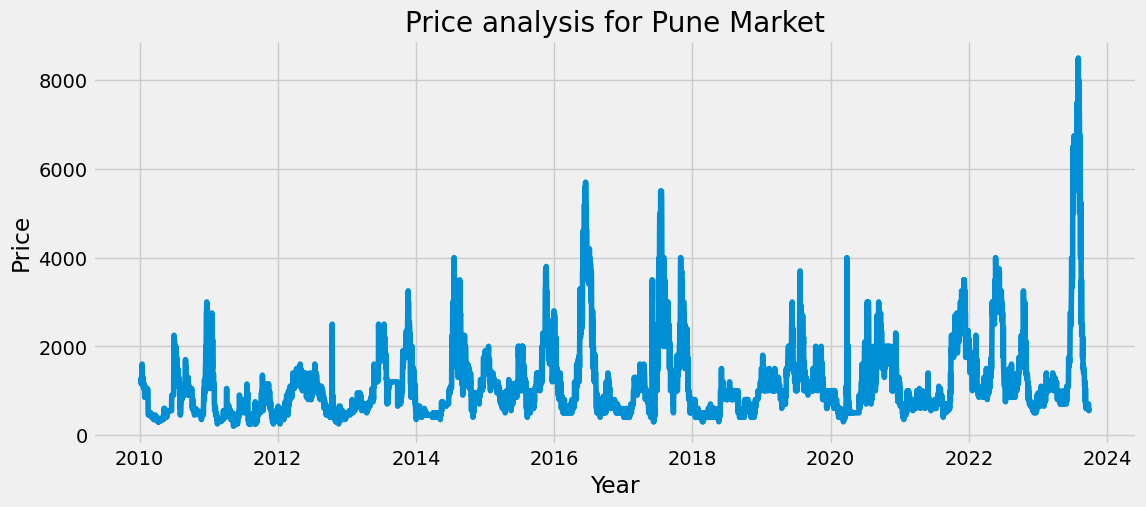

In [74]:
plt.figure(figsize=(12, 5))
plt.plot(data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price analysis for Pune Market')
plt.grid(True)
# plt.savefig('Price in Pune Market')
plt.show();

In [75]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['Price'])
test_result

(-8.678276327383585,
 4.355821758975288e-14,
 31,
 4985,
 {'1%': -3.4316624715142177,
  '5%': -2.862119970102166,
  '10%': -2.5670787188546584},
 68531.004299004)

In [76]:
from statsmodels.tsa.stattools import adfuller
test_result1=adfuller(data['Price'].diff().dropna())
test_result1

(-12.073765765571434,
 2.315437653896153e-22,
 28,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 68588.61597139365)

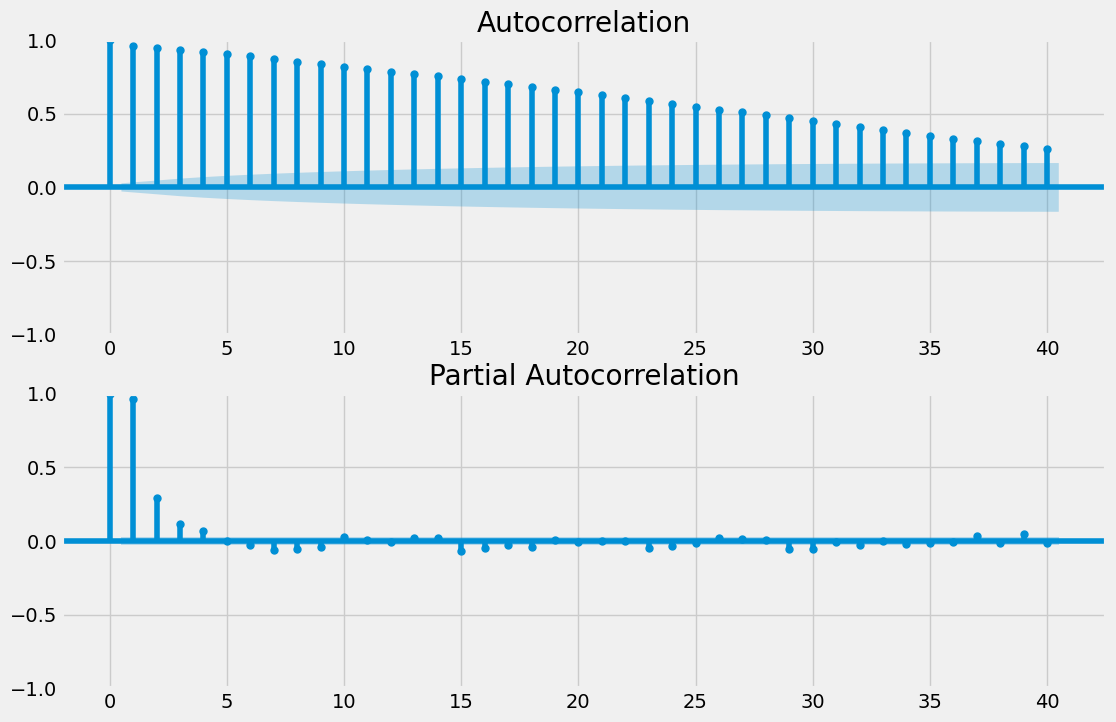

In [77]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Price'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Price'], lags=40, ax=ax2)
# plt.savefig('ACF anf PACF plot of data')
plt.show()

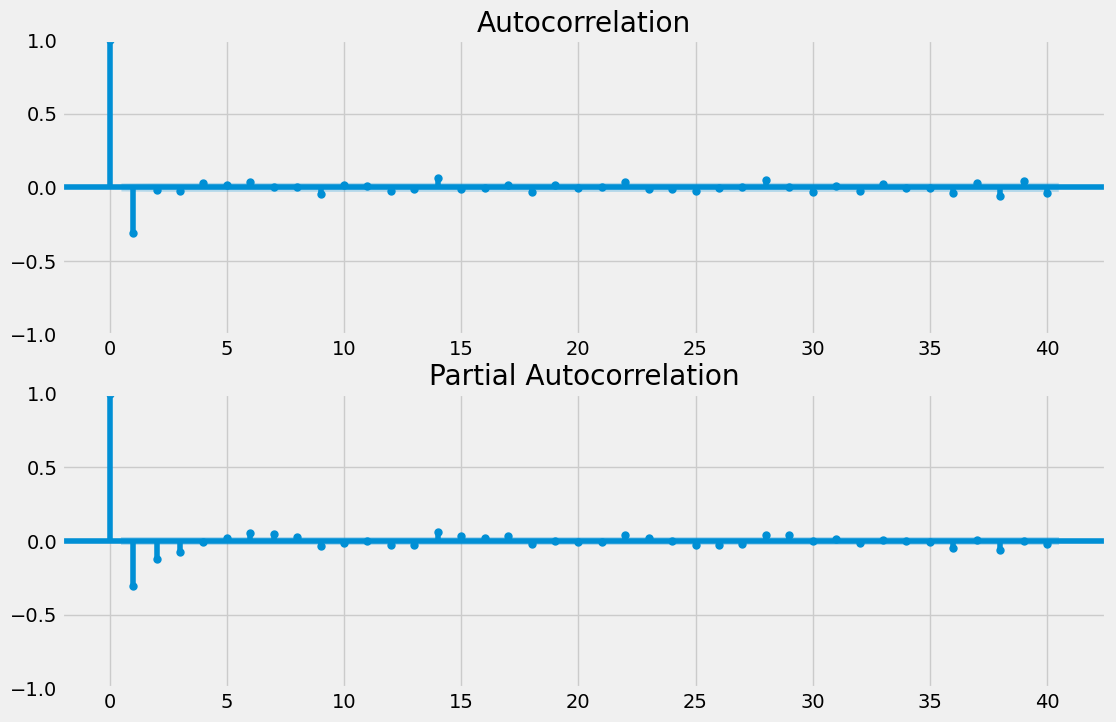

In [78]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Sales variable
fig = sm.graphics.tsa.plot_acf(data['Price'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Price'].diff().dropna(), lags=40, ax=ax2)
# plt.savefig('ACF anf PACF plot of data at first differencing')
plt.show()

In [79]:
# from arch import arch_model
# import pandas as pd
# import time

# start_time = time.time()
# # Define the parameter grid you want to search
# param_grid = {
#     'p': [0, 1, 2],  # Range of autoregressive (AR) lags
#     'o': [0, 1, 2],  # Range of order for the generalized ARCH process
#     'q': [0, 1, 2],  # Range of moving average (MA) lags
#     'power': [0.0, 1.0, 2.0],  # Range of the power parameter
#     'dist': ['normal', 't'],  # Distribution to use (normal or t)
#     'lags': [1, 2, 3],  # Range of lags
#     'mean': ['AR', 'Zero', 'Constant'],  # Type of mean model
#     'vol': ['ARCH', 'Garch']  # Type of volatility model
# }

# best_score = float('inf')
# best_params = None

# # Iterate through the parameter combinations
# for p in param_grid['p']:
#     for o in param_grid['o']:
#         for q in param_grid['q']:
#             for power in param_grid['power']:
#                 for dist in param_grid['dist']:
#                     for lags in param_grid['lags']:
#                         for mean in param_grid['mean']:
#                             for vol in param_grid['vol']:
#                                 try:
#                                     am = arch_model(data['Price'], lags=lags, mean=mean, vol=vol, p=p, o=o, q=q, power=power, dist=dist)
#                                     res = am.fit(update_freq=5, disp='off')
#                                     if res.aic < best_score:
#                                         best_score = res.aic
#                                         best_params = {'p': p, 'o': o, 'q': q, 'power': power, 'dist': dist, 'lags': lags, 'mean': mean, 'vol': vol}
#                                 except:
#                                     pass

# end_time = time.time()
# execution_time = end_time - start_time
# print("Best parameters found: ", best_params)
# print("Best AIC score: ", best_score)
# print("Execution time: {:.2f} seconds".format(execution_time))

In [80]:
train = data.iloc[:len(data)-0]
test = data.iloc[len(data)-1000:]

In [81]:
order = (2, 1, 2)  # ARIMA(3,0,0)
arima_model = sm.tsa.ARIMA(data['Price'], order=order)
arima_results = arima_model.fit()

# Obtain the residuals from the fitted results
residuals = arima_results.resid

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [82]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch

# Perform the LM test for lag correlation at the second order (ARCH effect)
# Perform the LM test for lag correlation at the second order (ARCH effect)
num_lags = 2  # Test up to the second lag
lm_test_result = het_arch(residuals, nlags=num_lags)
# Extract the test statistic and p-value
test_statistic, p_value, f_statistic, f_p_value = lm_test_result

print(f"LM Test Statistic: {test_statistic}")
print(f"P-Value: {p_value}")

# Check if the test is significant (p-value < alpha, where alpha is your significance level)
alpha = 0.05  # You can adjust the significance level as needed
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence of lag correlation (ARCH effect).")
else:
    print("Fail to reject the null hypothesis: There is no evidence of lag correlation (ARCH effect).")

LM Test Statistic: 345.4412245851156
P-Value: 9.736237749250821e-76
Reject the null hypothesis: There is evidence of lag correlation (ARCH effect).


In [83]:
from arch import arch_model
am = arch_model(train['Price'], mean='AR', lags = 3, vol='ARCH', p=2, o=1, q=2)
#am = arch_model(df['price'], mean='Zero', vol='EGARCH', p=1, o=0, q=1)
res = am.fit(update_freq=5, disp='off')
print(res.summary())

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.588e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                           AR - ARCH Model Results                            
Dep. Variable:                  Price   R-squared:                       0.928
Mean Model:                        AR   Adj. R-squared:                  0.928
Vol Model:                       ARCH   Log-Likelihood:               -33421.2
Distribution:                  Normal   AIC:                           66856.3
Method:            Maximum Likelihood   BIC:                           66902.0
                                        No. Observations:                 5014
Date:                Sat, Nov 30 2024   Df Residuals:                     5010
Time:                        10:31:58   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const         38.7532      9.844      3.937  8.261e-05   [ 19.45

In [84]:
# Perform residual tests and analysis
residuals = res.resid
residuals

Date
2010-01-03           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06     23.527225
2010-01-07     23.527225
                 ...    
2023-09-24     56.706012
2023-09-25     17.738783
2023-09-26   -108.513695
2023-09-27    -89.151963
2023-09-28     27.419221
Name: resid, Length: 5017, dtype: float64

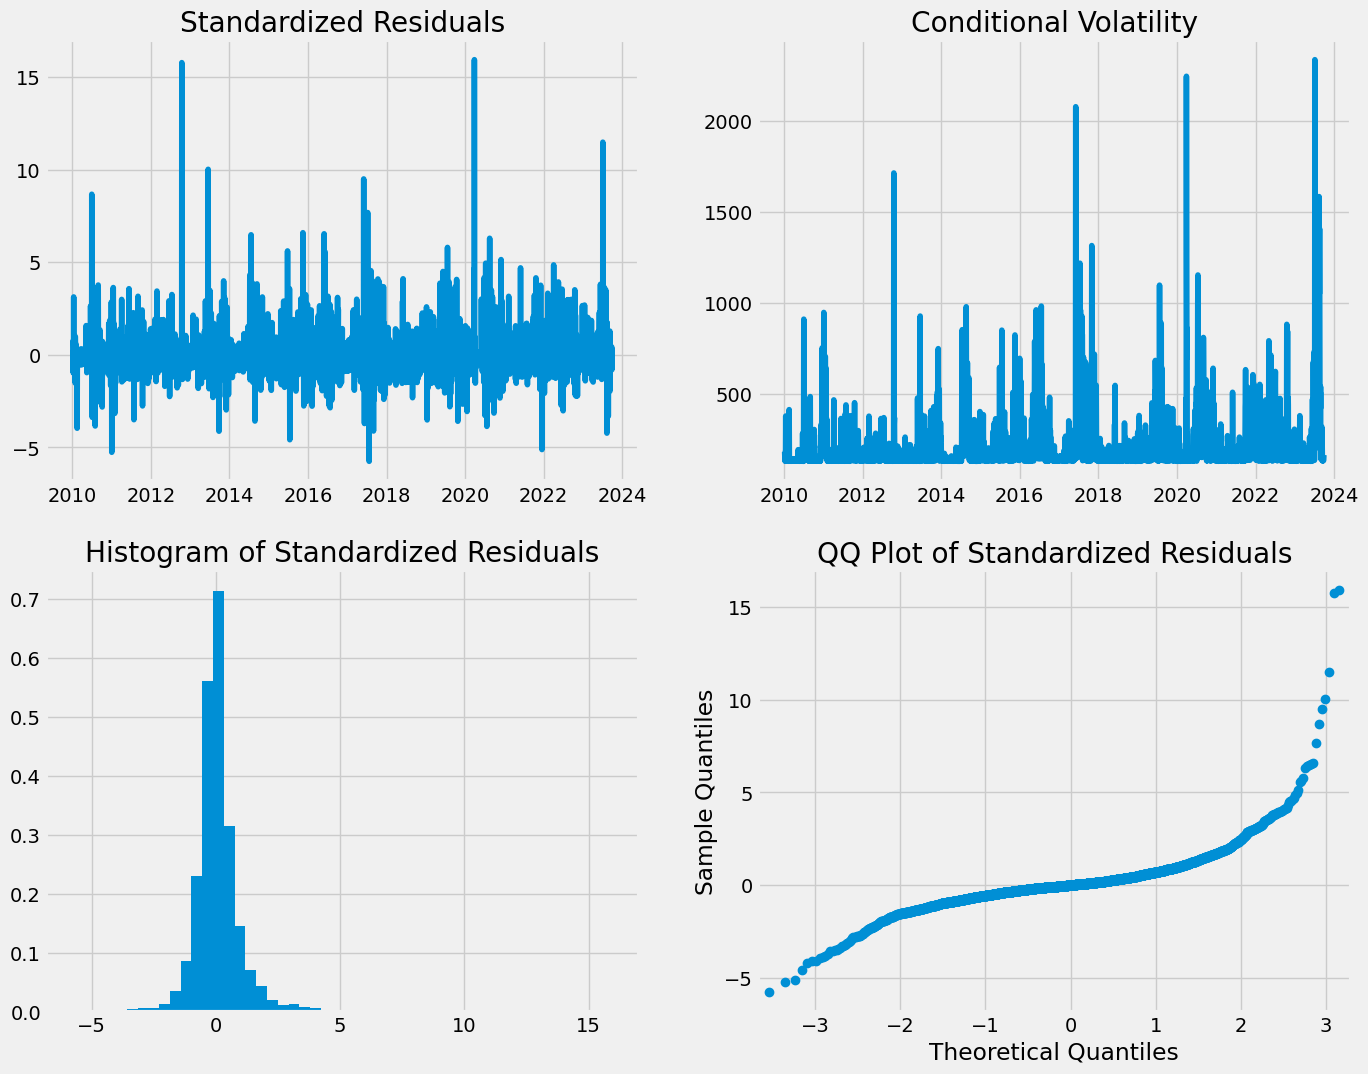

In [85]:
from arch import arch_model
import statsmodels.api as sm
import matplotlib.pyplot as plt

std_residuals = res.resid / res.conditional_volatility
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.plot(std_residuals)
plt.title('Standardized Residuals')
plt.subplot(2, 2, 2)
plt.plot(res.conditional_volatility)
plt.title('Conditional Volatility')
plt.subplot(2, 2, 3)
plt.hist(std_residuals, bins=50, density=True)
plt.title('Histogram of Standardized Residuals')
plt.subplot(2, 2, 4)
sm.qqplot(std_residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of Standardized Residuals')
# plt.savefig('plot diagnostics for arch model')
plt.show()

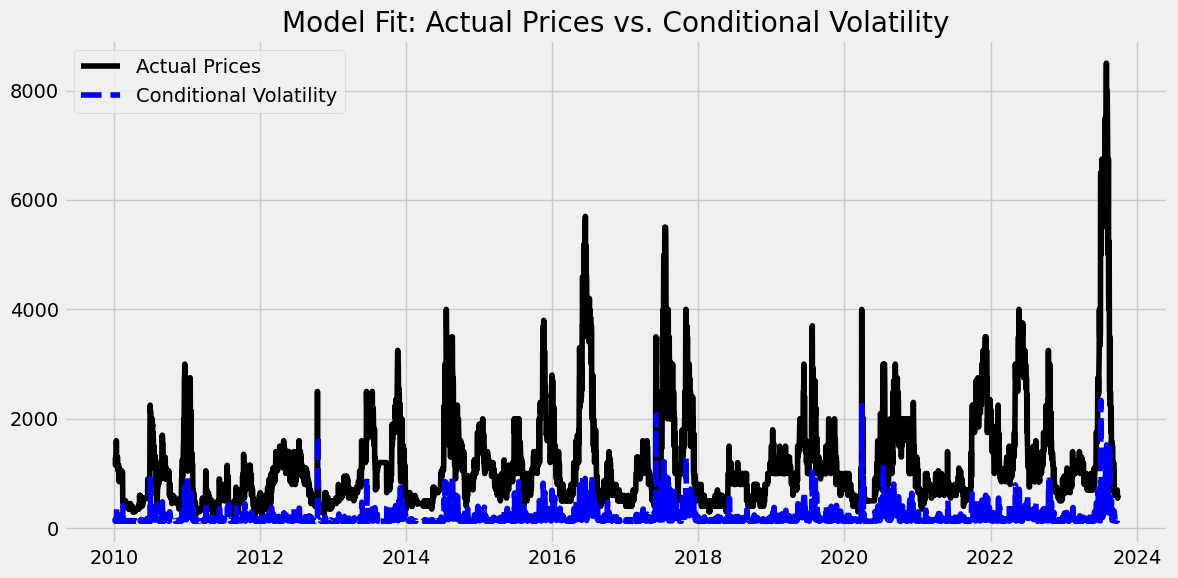

In [86]:
from arch import arch_model

# Plot the model's conditional mean and conditional volatility predictions
fig = plt.figure(figsize=(12, 6))

plt.plot(train['Price'], label='Actual Prices', linestyle='-', color='black')
plt.plot(res.conditional_volatility, label='Conditional Volatility', linestyle='--', color='blue')
plt.title('Model Fit: Actual Prices vs. Conditional Volatility')
plt.legend()


plt.tight_layout()
# plt.savefig('Actual Prices vs Conditional volatility for arch')
plt.show()

In [87]:
test

,Arrival,Price
Date,,
2021-01-02,177.0,1070.0
2021-01-03,353.0,650.0
2021-01-04,123.0,750.0
2021-01-05,174.0,750.0
2021-01-06,91.0,650.0
...,...,...
2023-09-24,235.0,700.0
2023-09-25,223.0,700.0
2023-09-26,246.0,600.0


In [88]:
forecast_horizon = 1  # Changesd=dt.datetime(2021,4,1)
sd = dt.datetime(2021,1,2)
# sd
forecast = res.forecast(start=sd, horizon=forecast_horizon)
forecast.mean

,h.1
Date,
2021-01-02,986.783571
2021-01-03,789.684541
2021-01-04,705.220455
2021-01-05,757.216994
2021-01-06,686.756562
...,...
2023-09-24,682.261217
2023-09-25,708.513695
2023-09-26,639.151963


In [89]:
forecast_df = pd.DataFrame()

In [90]:
forecast_df['Date'] = test.index

In [91]:
forecast_df.set_index('Date', inplace=True)

forecast_df.head()

""
Date
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06


In [92]:
forecast_df['Predicted_Price'] = forecast.mean['h.1']
forecast_df

,Predicted_Price
Date,
2021-01-02,986.783571
2021-01-03,789.684541
2021-01-04,705.220455
2021-01-05,757.216994
2021-01-06,686.756562
...,...
2023-09-24,682.261217
2023-09-25,708.513695
2023-09-26,639.151963


In [93]:
test_vs_pred = pd.DataFrame()

In [94]:
test_vs_pred

""


In [95]:
test_vs_pred['Price_Date'] = test.index

In [96]:

test_vs_pred.set_index('Price_Date', inplace=True)
test_vs_pred.info()
test_vs_pred.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2021-01-02 to 2023-09-28
Empty DataFrame


""
Price_Date
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06


In [97]:
test_vs_pred['Actual_price'] = test['Price']
test_vs_pred

,Actual_price
Price_Date,
2021-01-02,1070.0
2021-01-03,650.0
2021-01-04,750.0
2021-01-05,750.0
2021-01-06,650.0
...,...
2023-09-24,700.0
2023-09-25,700.0
2023-09-26,600.0


In [98]:
test_vs_pred['Predicted_price'] = forecast_df['Predicted_Price']
test_vs_pred

,Actual_price,Predicted_price
Price_Date,,
2021-01-02,1070.0,986.783571
2021-01-03,650.0,789.684541
2021-01-04,750.0,705.220455
2021-01-05,750.0,757.216994
2021-01-06,650.0,686.756562
...,...,...
2023-09-24,700.0,682.261217
2023-09-25,700.0,708.513695
2023-09-26,600.0,639.151963


In [99]:
test_and_pred=pd.concat([train['Price'],forecast_df],axis=1)
test_and_pred

,Price,Predicted_Price
Date,,
2010-01-03,1300.0,NaN
2010-01-04,1300.0,NaN
2010-01-05,1300.0,NaN
2010-01-06,1300.0,NaN
2010-01-07,1300.0,NaN
...,...,...
2023-09-24,700.0,682.261217
2023-09-25,700.0,708.513695
2023-09-26,600.0,639.151963


In [ ]:
import datetime as dt
forecast_horizon = 1
sd = train.index[2]
forecast_1 = res.forecast(start=sd, horizon=forecast_horizon)
forecast_1.mean

,h.1
Date,
2010-01-05,1276.472775
2010-01-06,1276.472775
2010-01-07,1276.472775
2010-01-08,1276.472775
2010-01-09,1276.472775
...,...
2023-09-24,682.261217
2023-09-25,708.513695
2023-09-26,639.151963


In [33]:
forecast1_df = pd.DataFrame()

In [34]:
forecast1_df['Date'] = train.index

In [35]:
forecast1_df

,Date
0,2010-01-03
1,2010-01-04
2,2010-01-05
3,2010-01-06
4,2010-01-07
...,...
5012,2023-09-24
5013,2023-09-25
5014,2023-09-26
5015,2023-09-27


In [36]:
forecast1_df.set_index('Date', inplace=True)

forecast1_df.head()

""
Date
2010-01-03
2010-01-04
2010-01-05
2010-01-06
2010-01-07


In [37]:
forecast1_df['Predicted_Price'] = forecast_1.mean['h.1']
forecast1_df

,Predicted_Price
Date,
2010-01-03,NaN
2010-01-04,NaN
2010-01-05,1276.472775
2010-01-06,1276.472775
2010-01-07,1276.472775
...,...
2023-09-24,682.261217
2023-09-25,708.513695
2023-09-26,639.151963


In [38]:
train_and_pred=pd.concat([train['Price'],forecast1_df],axis=1)
train_and_pred

,Price,Predicted_Price
Date,,
2010-01-03,1300.0,NaN
2010-01-04,1300.0,NaN
2010-01-05,1300.0,1276.472775
2010-01-06,1300.0,1276.472775
2010-01-07,1300.0,1276.472775
...,...,...
2023-09-24,700.0,682.261217
2023-09-25,700.0,708.513695
2023-09-26,600.0,639.151963


Text(0.5, 1.0, 'Price Prediction of Tomato Market')

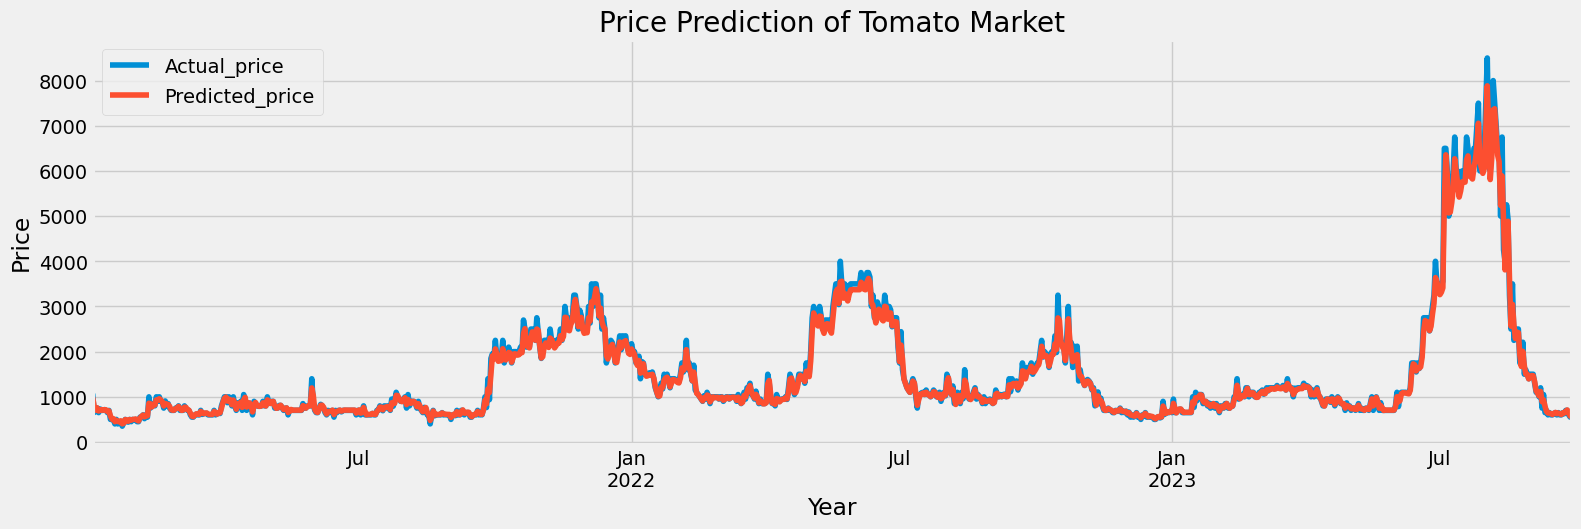

In [100]:
test_vs_pred.plot(figsize=(17,5))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price Prediction of Tomato Market')
# plt.savefig('test vs predicted values for arch model')

Text(0.5, 1.0, 'ARCH - Price Prediction of Tomato Market')

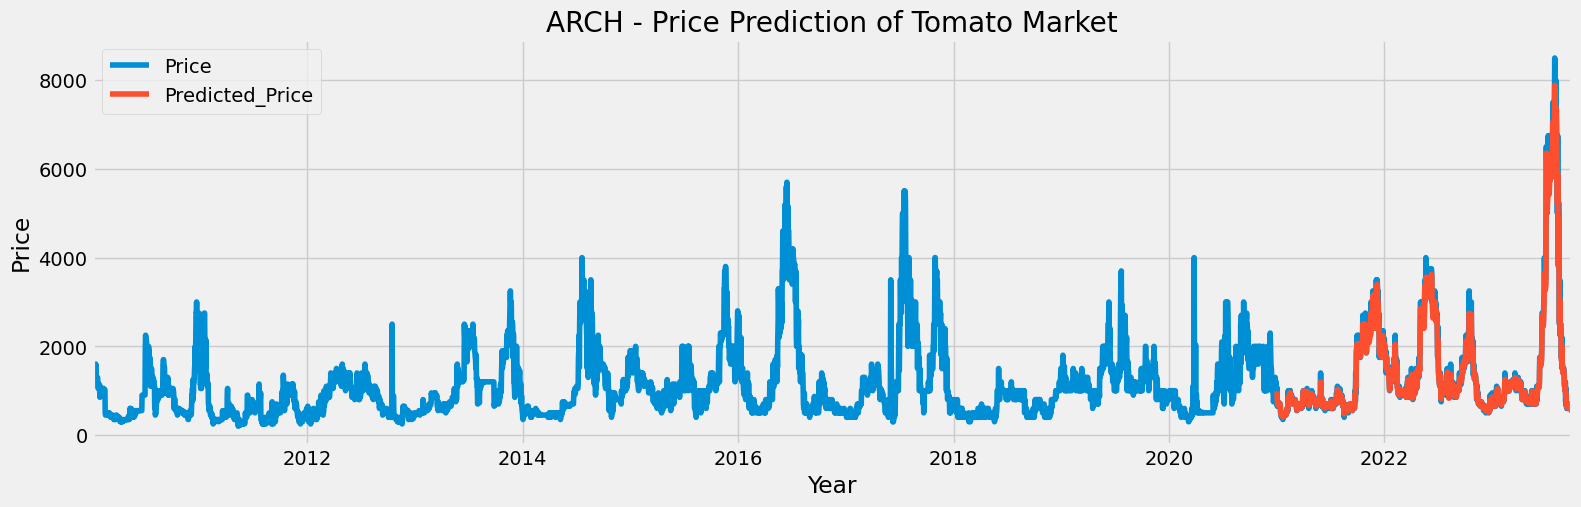

In [101]:
test_and_pred.plot(figsize=(17,5))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('ARCH - Price Prediction of Tomato Market')
# plt.savefig('Train and preidcted values for arch')

In [102]:
# Assuming 'res2' is your fitted GARCH model
# Forecast the next 60 days using simulations
forecast_horizon = 100  # Number of days to forecast

# Use simulation-based forecasting
forecast = res.forecast(
    horizon=forecast_horizon,
    method="simulation",  # Switch to simulation-based forecasting
    simulations=1000  # Number of simulations to use
)

# Extract the mean forecast
forecast_mean = forecast.mean.iloc[-1]  # Use the last row for the forecasted values

# Create a date range for the forecast period
last_date = data.index[-1]  # Assuming 'data' is your original dataset
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=forecast_horizon)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': forecast_mean.values.flatten()  # Flatten the array
})

# Set 'Date' as the index
forecast_df = forecast_df.set_index('Date')

# print(forecast_df)


In [ ]:
# forecast_df.to_excel('D:/AAU/Module_4/Project_mo_4/arch_forecasted.xlsx')

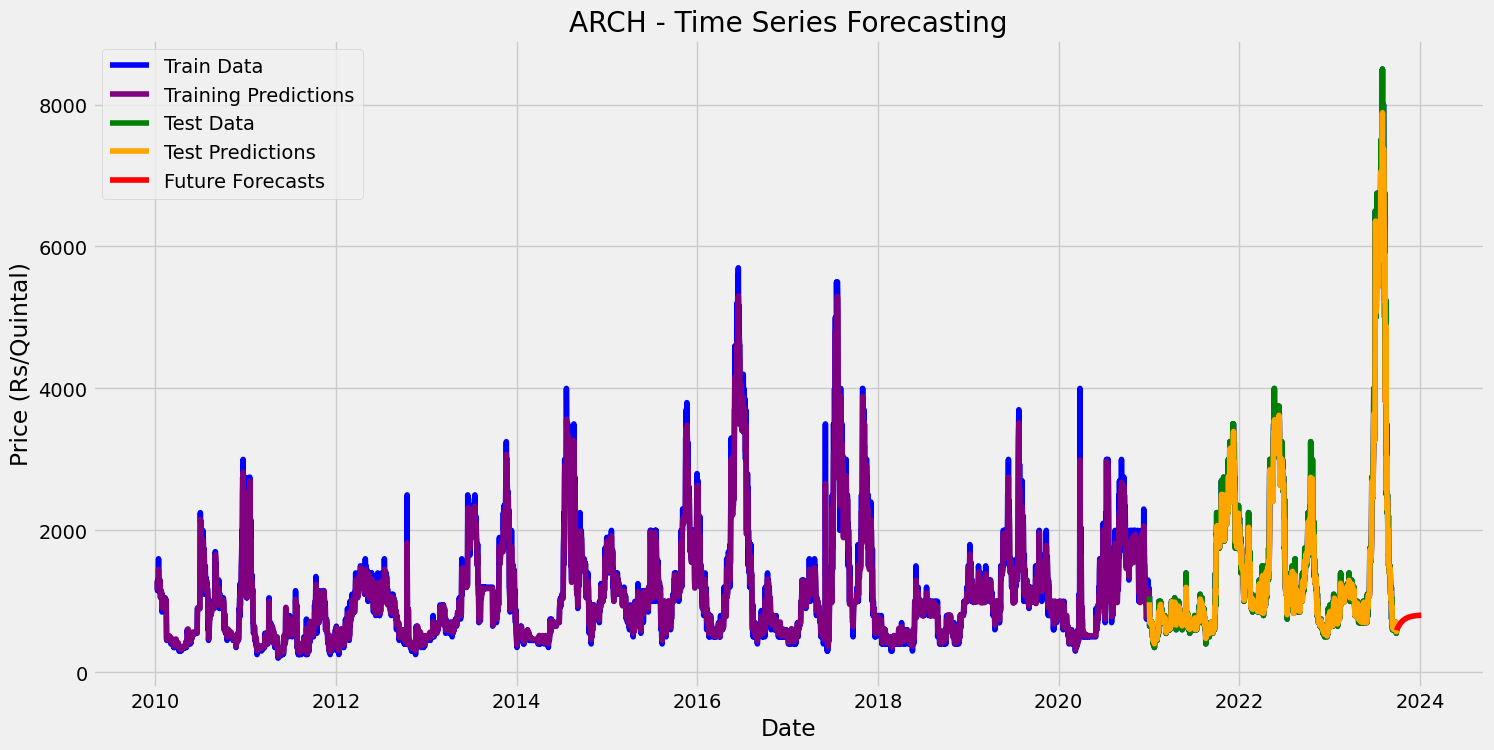

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
# Plot training set predictions (if available and relevant)
plt.plot(train['Price'], label='Train Data', color='blue')
plt.plot(train_and_pred['Predicted_Price'], label='Training Predictions', color='purple')
# Plot test set predictions
plt.plot(test['Price'], label='Test Data', color='green')
plt.plot(test_vs_pred['Predicted_price'], label='Test Predictions', color='orange')



# Plot future forecasts
plt.plot(forecast_df['Predicted_Price'], label='Future Forecasts', color='red')

plt.xlabel('Date')
plt.ylabel('Price (Rs/Quintal)')
plt.title('ARCH - Time Series Forecasting')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from arch import arch_model
am2 = arch_model(train['Price'], mean='AR', lags = 3, vol='GARCH', power=2, dist='t', p=2, o=1, q=2)
#am = arch_model(df['price'], mean='Zero', vol='EGARCH', p=1, o=0, q=1)
res2 = am2.fit(update_freq=5, disp='off')
print(res2.summary())

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.588e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                            AR - GJR-GARCH Model Results                            
Dep. Variable:                        Price   R-squared:                       0.929
Mean Model:                              AR   Adj. R-squared:                  0.929
Vol Model:                        GJR-GARCH   Log-Likelihood:               -31433.7
Distribution:      Standardized Student's t   AIC:                           62889.4
Method:                  Maximum Likelihood   BIC:                           62961.2
                                              No. Observations:                 5014
Date:                      Sat, Nov 30 2024   Df Residuals:                     5010
Time:                              10:29:54   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
C

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [44]:
# Perform residual tests and analysis
residuals2 = res2.resid
residuals2

Date
2010-01-03          NaN
2010-01-04          NaN
2010-01-05          NaN
2010-01-06    -0.002087
2010-01-07    -0.002087
                ...    
2023-09-24    71.728762
2023-09-25    28.481665
2023-09-26   -88.813794
2023-09-27   -92.921312
2023-09-28    13.642100
Name: resid, Length: 5017, dtype: float64

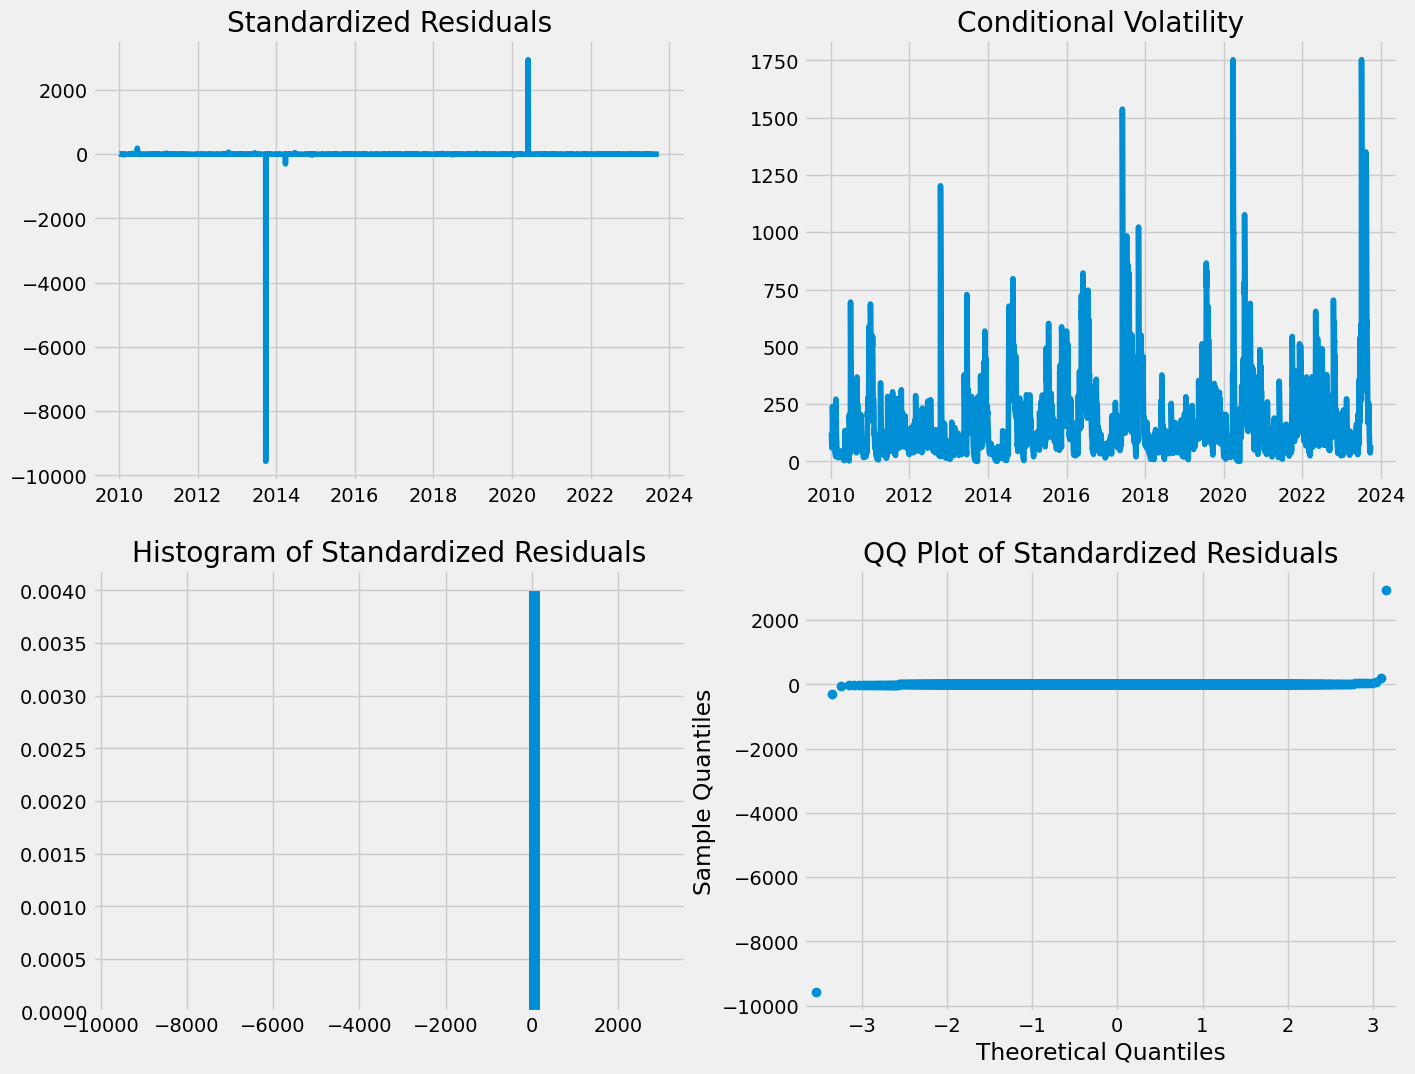

In [45]:
from arch import arch_model
import statsmodels.api as sm
import matplotlib.pyplot as plt

std_residuals2 = res2.resid / res2.conditional_volatility
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.plot(std_residuals2)
plt.title('Standardized Residuals')
plt.subplot(2, 2, 2)
plt.plot(res2.conditional_volatility)
plt.title('Conditional Volatility')
plt.subplot(2, 2, 3)
plt.hist(std_residuals2, bins=50, density=True)
plt.title('Histogram of Standardized Residuals')
plt.subplot(2, 2, 4)
sm.qqplot(std_residuals2, line='s', ax=plt.gca())
plt.title('QQ Plot of Standardized Residuals')
# plt.savefig('plot diagnostics for Garch Model')
plt.show()

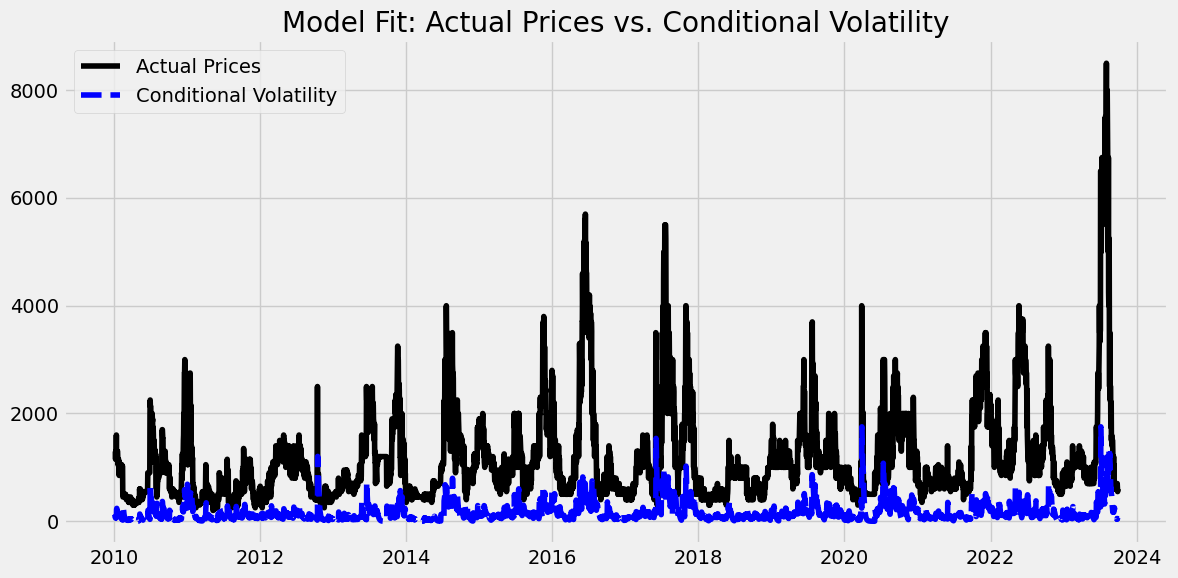

In [46]:
from arch import arch_model

# Plot the model's conditional mean and conditional volatility predictions
fig = plt.figure(figsize=(12, 6))

plt.plot(train['Price'], label='Actual Prices', linestyle='-', color='black')
plt.plot(res2.conditional_volatility, label='Conditional Volatility', linestyle='--', color='blue')
plt.title('Model Fit: Actual Prices vs. Conditional Volatility')
plt.legend()


plt.tight_layout()
# plt.savefig('D:/AAU/Module_4/Actual Prices vs Conditional volatility for Garch.png')
plt.show()

In [47]:
test

,Arrival,Price
Date,,
2021-01-02,177.0,1070.0
2021-01-03,353.0,650.0
2021-01-04,123.0,750.0
2021-01-05,174.0,750.0
2021-01-06,91.0,650.0
...,...,...
2023-09-24,235.0,700.0
2023-09-25,223.0,700.0
2023-09-26,246.0,600.0


In [48]:
forecast_horizon2 = 1  # Change this to your desired forecast horizon
sd = dt.datetime(2021,1,2)
forecast2 = res2.forecast(start=sd, horizon=forecast_horizon2)
forecast2.mean

,h.1
Date,
2021-01-02,997.903109
2021-01-03,797.516478
2021-01-04,769.654618
2021-01-05,735.088847
2021-01-06,692.922208
...,...
2023-09-24,671.518335
2023-09-25,688.813794
2023-09-26,642.921312


In [49]:
forecast_df2 = pd.DataFrame()

In [50]:
forecast_df2['Price_Date'] = test.index

In [51]:
forecast_df2.set_index('Price_Date', inplace=True)

forecast_df2.head()

""
Price_Date
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06


In [52]:
forecast_df2['Predicted_Price'] = forecast2.mean['h.1']
forecast_df2

,Predicted_Price
Price_Date,
2021-01-02,997.903109
2021-01-03,797.516478
2021-01-04,769.654618
2021-01-05,735.088847
2021-01-06,692.922208
...,...
2023-09-24,671.518335
2023-09-25,688.813794
2023-09-26,642.921312


In [53]:
test_vs_pred2 = pd.DataFrame()

In [54]:
test_vs_pred2['Price_Date'] = test.index

In [55]:
test_vs_pred2.set_index('Price_Date', inplace=True)

test_vs_pred2.head()

""
Price_Date
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06


In [56]:
test_vs_pred2['Actual_price'] = test['Price']
test_vs_pred2

,Actual_price
Price_Date,
2021-01-02,1070.0
2021-01-03,650.0
2021-01-04,750.0
2021-01-05,750.0
2021-01-06,650.0
...,...
2023-09-24,700.0
2023-09-25,700.0
2023-09-26,600.0


In [57]:
test_vs_pred2['Predicted_price'] = forecast_df2['Predicted_Price']
test_vs_pred2

,Actual_price,Predicted_price
Price_Date,,
2021-01-02,1070.0,997.903109
2021-01-03,650.0,797.516478
2021-01-04,750.0,769.654618
2021-01-05,750.0,735.088847
2021-01-06,650.0,692.922208
...,...,...
2023-09-24,700.0,671.518335
2023-09-25,700.0,688.813794
2023-09-26,600.0,642.921312


In [58]:
test_and_pred2=pd.concat([train['Price'],forecast_df2],axis=1)
test_and_pred2

,Price,Predicted_Price
2010-01-03,1300.0,NaN
2010-01-04,1300.0,NaN
2010-01-05,1300.0,NaN
2010-01-06,1300.0,NaN
2010-01-07,1300.0,NaN
...,...,...
2023-09-24,700.0,671.518335
2023-09-25,700.0,688.813794
2023-09-26,600.0,642.921312
2023-09-27,550.0,586.357900


In [59]:
import datetime as dt
forecast_horizon = 1
sd = train.index[2]
forecast_1 = res2.forecast(start=sd, horizon=forecast_horizon)
forecast_1.mean

,h.1
Date,
2010-01-05,1300.002087
2010-01-06,1300.002087
2010-01-07,1300.002087
2010-01-08,1300.002087
2010-01-09,1300.002087
...,...
2023-09-24,671.518335
2023-09-25,688.813794
2023-09-26,642.921312


In [60]:
forecast1_df = pd.DataFrame()

In [61]:
forecast1_df['Date'] = train.index

In [62]:
forecast1_df.set_index('Date', inplace=True)

forecast1_df.head()

""
Date
2010-01-03
2010-01-04
2010-01-05
2010-01-06
2010-01-07


In [63]:
forecast1_df['Predicted_Price'] = forecast_1.mean['h.1']
forecast1_df

,Predicted_Price
Date,
2010-01-03,NaN
2010-01-04,NaN
2010-01-05,1300.002087
2010-01-06,1300.002087
2010-01-07,1300.002087
...,...
2023-09-24,671.518335
2023-09-25,688.813794
2023-09-26,642.921312


In [64]:
train_and_pred=pd.concat([train['Price'],forecast1_df],axis=1)
train_and_pred

,Price,Predicted_Price
Date,,
2010-01-03,1300.0,NaN
2010-01-04,1300.0,NaN
2010-01-05,1300.0,1300.002087
2010-01-06,1300.0,1300.002087
2010-01-07,1300.0,1300.002087
...,...,...
2023-09-24,700.0,671.518335
2023-09-25,700.0,688.813794
2023-09-26,600.0,642.921312


In [ ]:
forecast_horizon = 60  # Number of days to forecast

# Use simulation-based forecasting
forecast = res2.forecast(
    horizon=forecast_horizon,
    method="simulation",  # Switch to simulation-based forecasting
    simulations=1000  # Number of simulations to use
)

# Extract the mean forecast
forecast_mean = forecast.mean.iloc[-1]  # Use the last row for the forecasted values

# Create a date range for the forecast period
last_date = data.index[-1]  # Assuming 'data' is your original dataset
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=forecast_horizon)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': forecast_mean.values.flatten()  # Flatten the array
})

# Set 'Date' as the index
forecast_df = forecast_df.set_index('Date')

# print(forecast_df)


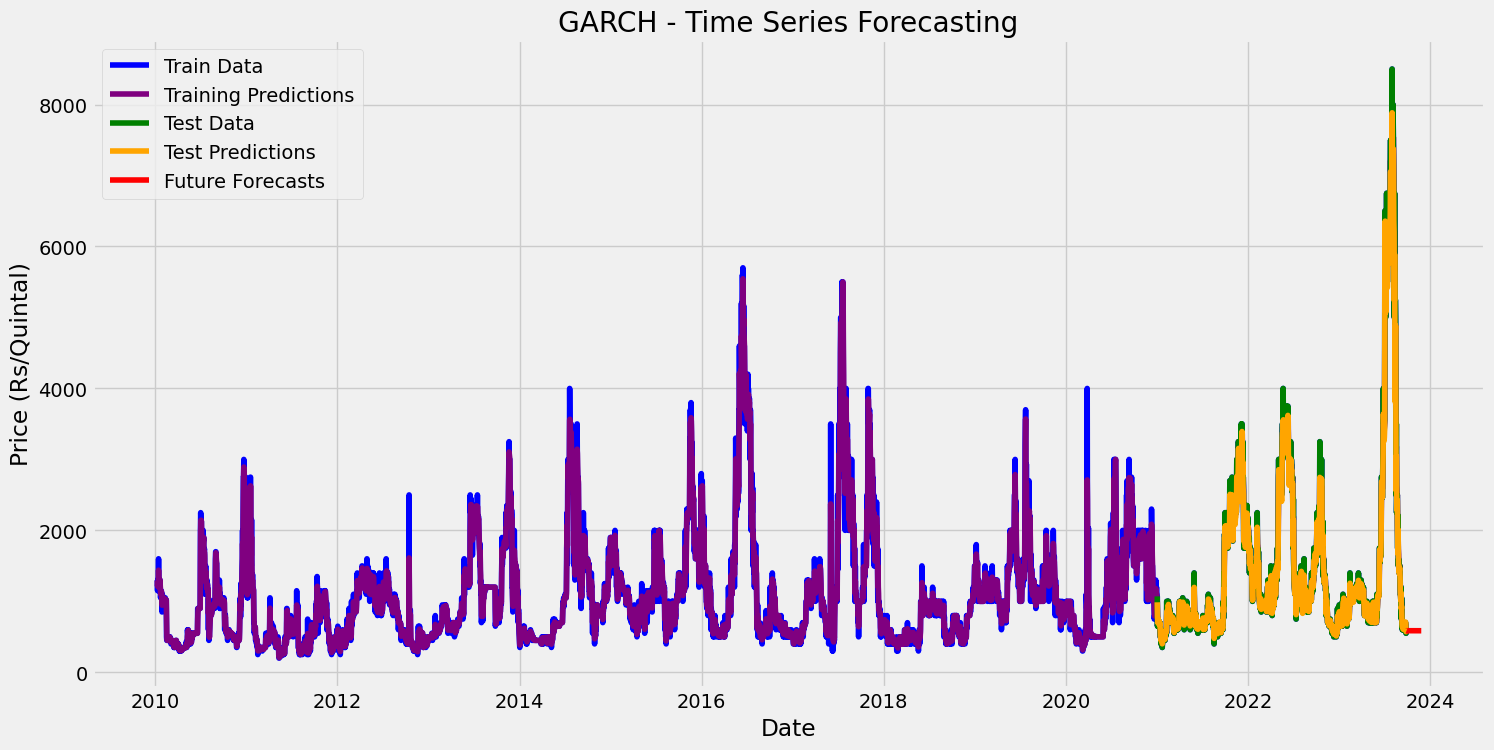

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
# Plot training set predictions (if available and relevant)
plt.plot(train['Price'], label='Train Data', color='blue')
plt.plot(train_and_pred['Predicted_Price'], label='Training Predictions', color='purple')
# Plot test set predictions
plt.plot(test['Price'], label='Test Data', color='green')
plt.plot(test_vs_pred['Predicted_price'], label='Test Predictions', color='orange')



# Plot future forecasts
plt.plot(forecast_df['Predicted_Price'], label='Future Forecasts', color='red')

plt.xlabel('Date')
plt.ylabel('Price (Rs/Quintal)')
plt.title('GARCH - Time Series Forecasting')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Price Prediction of Tomato Market')

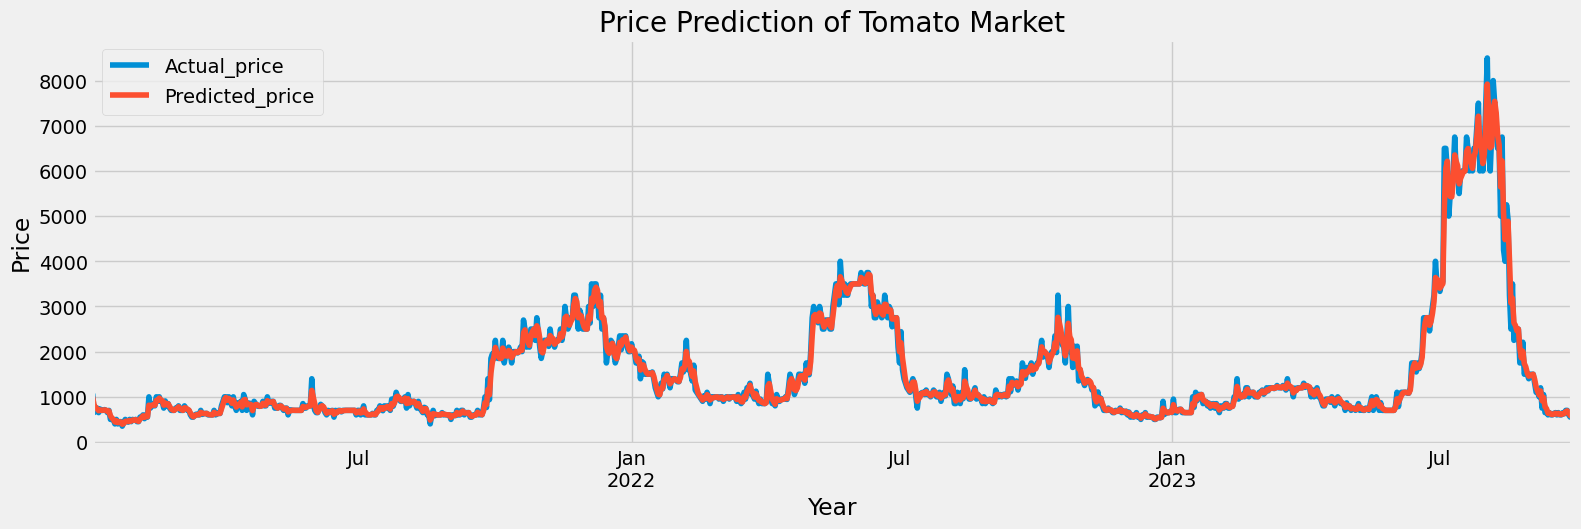

In [67]:
test_vs_pred2.plot(figsize=(17,5))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price Prediction of Tomato Market')
# plt.savefig('D:/AAU/Module_4/test vs predicted values for Garch model.png')

Text(0.5, 1.0, 'GARCH - Price Prediction of Tomato Market')

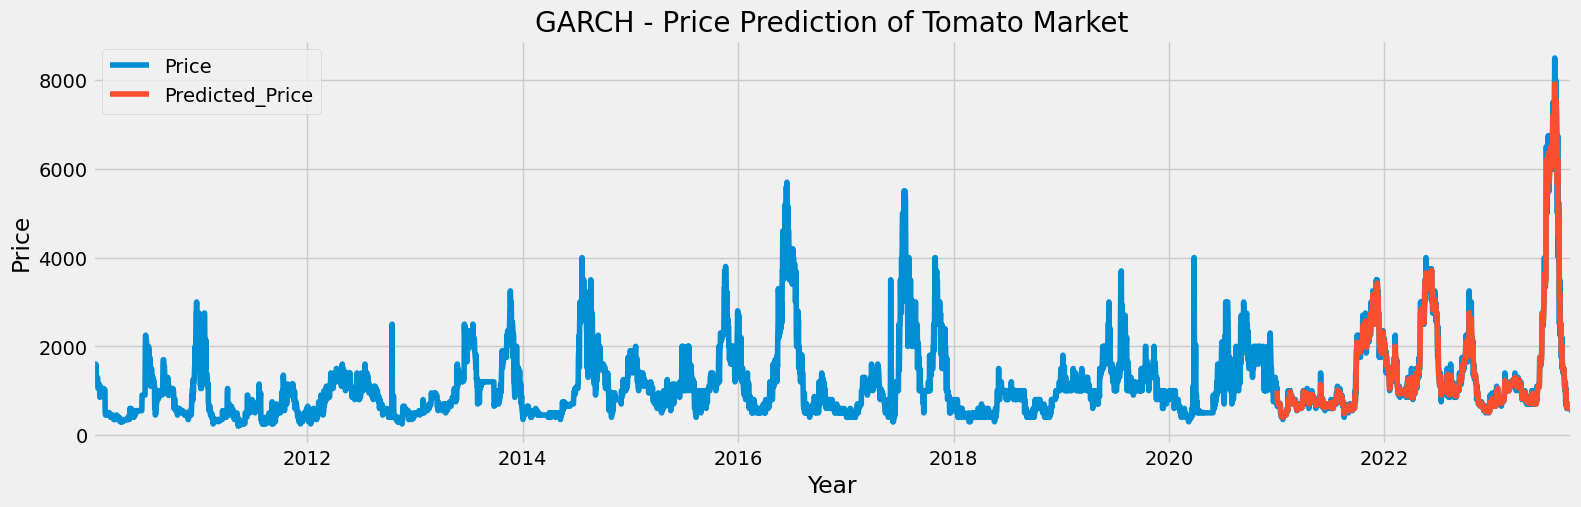

In [68]:
test_and_pred2.plot(figsize=(17,5))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('GARCH - Price Prediction of Tomato Market')
# plt.savefig('Train and predicted values for garch model')

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

y_true = test["Price"]
y_range = np.max(y_true) - np.min(y_true)

rmse_arch =math.sqrt(mean_squared_error(forecast_df['Predicted_Price'],test['Price']))
print('Mean value of price is : {}. Root Mean Squared Error is :{}'.format(mean(test['Price']),rmse_arch))
rmse_percentage = (rmse_arch / y_range) * 100
print(f'Root Mean Squared Error (RMSE) as a percentage of the range: {rmse_percentage:.2f}%')
mse=rmse_arch*rmse_arch
print('MSE of ARCH',mse)

# Calculate NRMSE (normalized by mean of observed values)
nrmse = rmse_arch / np.mean(y_true)
print(f'Normalized RMSE (NRMSE): {nrmse:.2f}')

In [ ]:
y_true = test["Price"]
y_range = np.max(y_true) - np.min(y_true)

rmse_garch =math.sqrt(mean_squared_error(forecast_df2['Predicted_Price'],test['Price']))
print('Mean value of price is : {}. Root Mean Squared Error is :{}'.format(mean(test['Price']),rmse_garch))
rmse_percentage = (rmse_garch / y_range) * 100
print(f'Root Mean Squared Error (RMSE) as a percentage of the range: {rmse_percentage:.2f}%')
mse=rmse_garch*rmse_garch
print('MSE of GARCH',mse)

# Calculate NRMSE (normalized by mean of observed values)
nrmse = rmse_garch / np.mean(y_true)
print(f'Normalized RMSE (NRMSE): {nrmse:.2f}')

Mean value of price is : 1504.3844444444444. Root Mean Squared Error is :121.23980504388373
Root Mean Squared Error (RMSE) as a percentage of the range: 1.49%
MSE of GARCH 14699.090327078935
Normalized RMSE (NRMSE): 0.08


In [ ]:
# Forecast the next 60 days
forecast_horizon = 100
forecast = res2.forecast(horizon=forecast_horizon)

# Extract the mean forecast
forecast_mean = forecast.mean

# Create a date range for the forecast period
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=forecast_horizon)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': forecast_mean.values.flatten()  # Flatten the array
})

# Set 'Date' as the index
forecast_df = forecast_df.set_index('Date')

forecast_df

,Predicted_Price
Date,
2023-09-29,585.975330
2023-09-30,584.533963
2023-10-01,587.232171
2023-10-02,586.277898
2023-10-03,586.274746
...,...
2024-01-02,585.744929
2024-01-03,585.738135
2024-01-04,585.731341


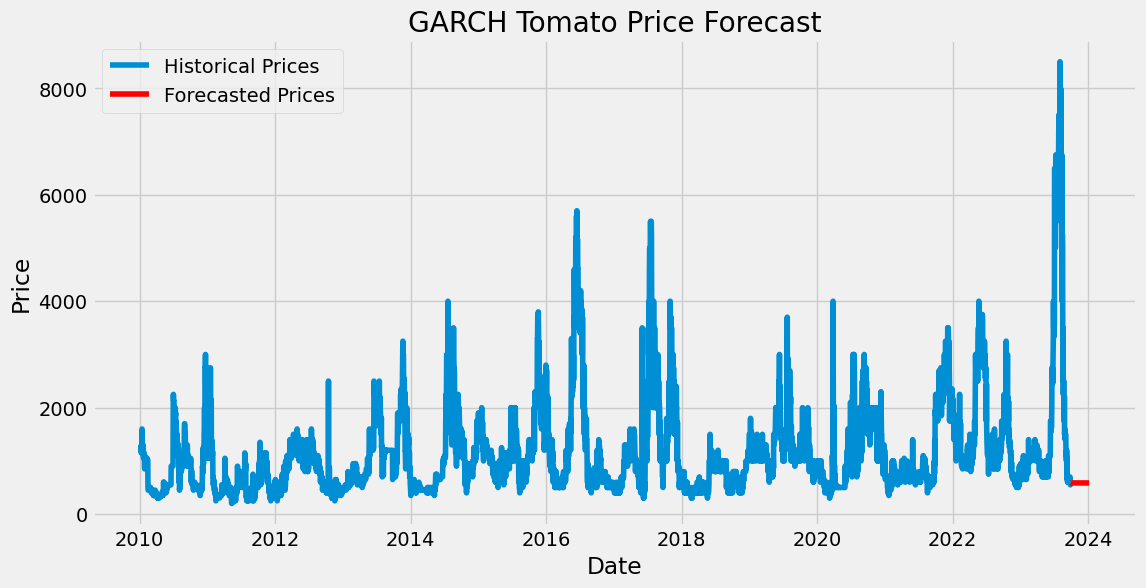

In [ ]:
# Assuming 'forecast_df' contains the forecast data with 'Date' as index and 'Predicted_Price' as column
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Historical Prices')
plt.plot(forecast_df['Predicted_Price'], label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GARCH Tomato Price Forecast')
plt.legend()
plt.grid(True)
plt.show()

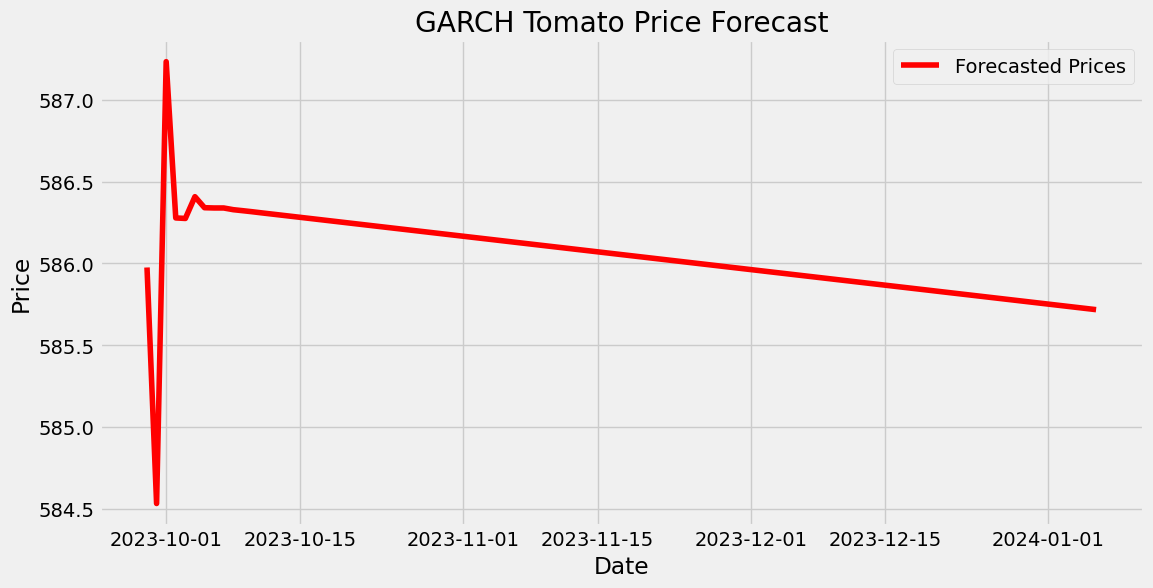

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Predicted_Price'], label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GARCH Tomato Price Forecast')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Forecast the next 60 days
forecast_horizon1 = 100
forecast1 = res.forecast(horizon=forecast_horizon)

# Extract the mean forecast
forecast_mean1 = forecast1.mean

# Create a date range for the forecast period
last_date1 = data.index[-1]
future_dates1 = pd.date_range(start=last_date1 + pd.DateOffset(days=1), periods=forecast_horizon1)

# Create a DataFrame for the forecast
forecast_df1 = pd.DataFrame({
    'Date': future_dates1,
    'Predicted_Price': forecast_mean1.values.flatten()  # Flatten the array
})

# Set 'Date' as the index
forecast_df1 = forecast_df1.set_index('Date')

forecast_df1

,Predicted_Price
Date,
2023-09-29,593.239212
2023-09-30,607.739240
2023-10-01,612.853916
2023-10-02,621.393155
2023-10-03,628.112788
...,...
2024-01-02,803.669100
2024-01-03,803.869030
2024-01-04,804.061331


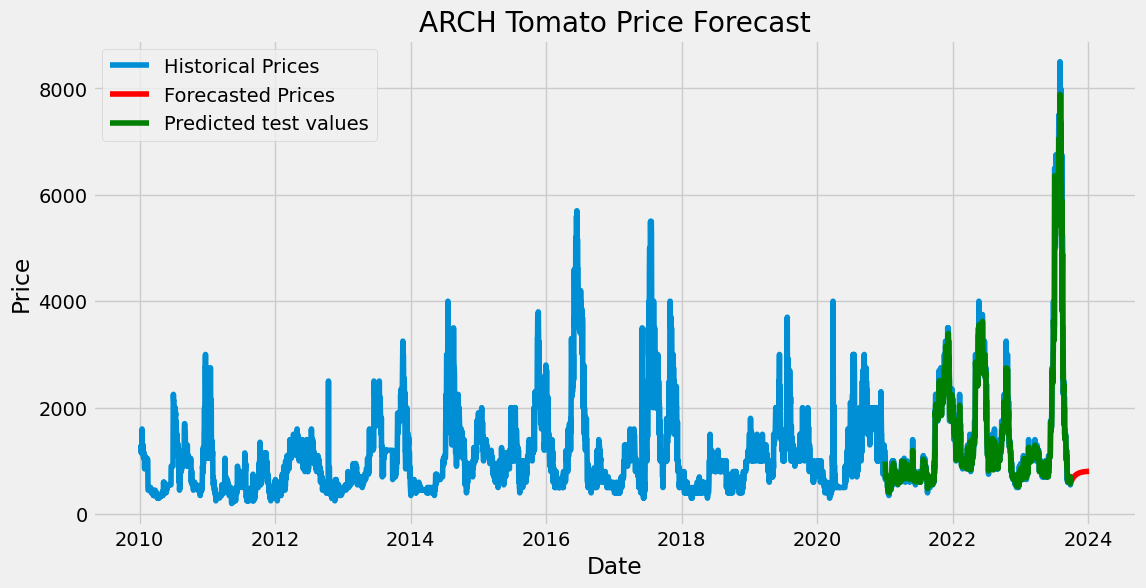

In [ ]:
# Assuming 'forecast_df' contains the forecast data with 'Date' as index and 'Predicted_Price' as column
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Historical Prices')
plt.plot(forecast_df1['Predicted_Price'], label='Forecasted Prices', color='red')
plt.plot(test_and_pred['Predicted_Price'],label='Predicted test values',color='green')
# plt.title('Tomato Price Forecast
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARCH Tomato Price Forecast')
plt.legend()
plt.grid(True)
plt.show()

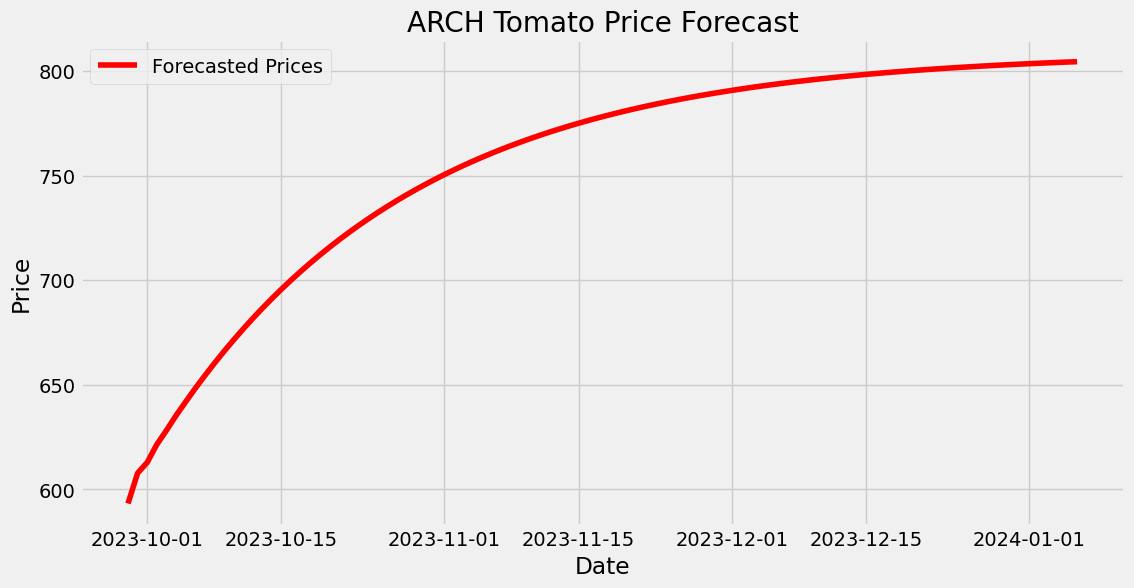

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df1['Predicted_Price'], label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARCH Tomato Price Forecast')
plt.grid(True)
plt.legend()
plt.show()